# Data Visualization for Storytelling and Statistical Inference

## 23.01.2026 - HERMES Workshop Series Data Visualization and Storytelling

Welcome to the workshop!

In this notebook, you'll practice the material from [the corresponding online lesson](https://hermes-dkz.github.io/stat_inf_data_vis/01_introduction.html). 

Both the lesson content and this notebook were created by [Golnaz Sarkar Farshi](mailto:golnaz.sarkarfarshi@uni-marburg.de).

📋 First things first! Please enter your name and email address in the [attendance list](https://nocodb.nfdi4culture.de/dashboard/#/nc/form/4d046825-7bf4-433a-b547-9521e329e563). This information will be used to issue a certificate of participation and send it to you after the workshop. 

## Exploring the Dataset

The dataset we’re working with is stored in a CSV (comma-separated values) file on GitHub. Let’s load it into our notebook and store it in a pandas DataFrame named happy_df:

In [1]:
import pandas as pd

# path to the dataset: 
url= "https://raw.githubusercontent.com/HERMES-DKZ/stat_inf_data_vis/main/episodes/data/income_happiness_correlation.csv"

# loading the dataset and storing it in a pandas DataFrame:
# YOUR CODE HERE
happy_df= pd.read_csv(url)

# displaying the first five rows of the DataFrame: 
# YOUR CODE HERE
happy_df.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


What types of values do you see in each column? Which columns contain numerical values, and which contain categorical values? What information does the dataset include, and what information might be missing?

Run the following line of code to gain more information about the structure of happy_df:

In [2]:
# displaying information about the DataFrame:
# YOUR CODE HERE
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                111 non-null    object 
 1   adjusted_satisfaction  111 non-null    float64
 2   avg_satisfaction       111 non-null    float64
 3   std_satisfaction       111 non-null    float64
 4   avg_income             111 non-null    float64
 5   median_income          111 non-null    float64
 6   income_inequality      111 non-null    float64
 7   region                 111 non-null    object 
 8   happyScore             111 non-null    float64
 9   GDP                    111 non-null    float64
 10  country.1              111 non-null    object 
dtypes: float64(8), object(3)
memory usage: 9.7+ KB


❓ Which column contains values that could be dependent on other features, and thereby correlates with them? Would it be possible to predict the values of this column, given the values of one or more other columns in the dataset?

## Drawing Heatmaps

One of the best and easiest ways to visualize correlations is through correlographic heatmaps. However, heatmaps can only show how changes in one numerical value are correlated with changes in another numerical value. Therefore, to create a heatmap of all numerical features that could be correlated with happyScore, we need to exclude the columns in happy_df that contain non-numerical values:

In [3]:
# selecting only the columns whose values are not of type 'object' and storing them in a new DataFrame:
# YOUR CODE HERE
numerical_df= happy_df.select_dtypes(exclude=['object'])

# displaying the first five rows of the new DataFrame:
numerical_df.head()

,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,happyScore,GDP
0,37.0,4.9,2.42,2096.76,1731.506667,31.445556,4.350,0.76821
1,26.0,4.3,3.19,1448.88,1044.240000,42.720000,4.033,0.75778
2,60.0,7.1,1.91,7101.12,5109.400000,45.475556,6.574,1.05351
3,59.0,7.2,2.11,19457.04,16879.620000,30.296250,7.200,1.33723
4,65.0,7.6,1.80,19917.00,15846.060000,35.285000,7.284,1.33358


Now, let’s use the Python library Seaborn to create a heatmap of all the values in numerical_df:

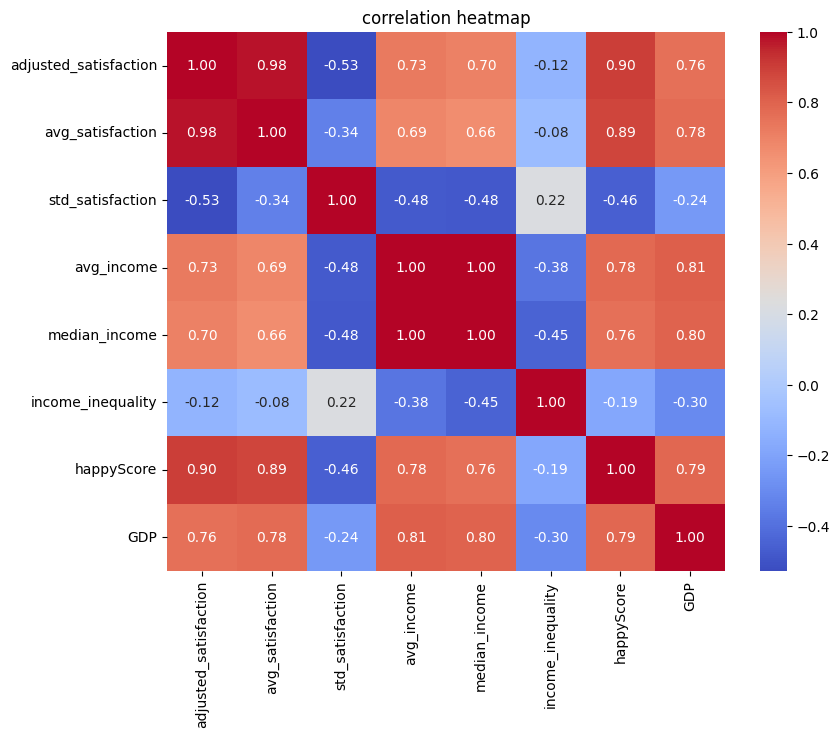

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# creating a matrix that contains the correlation of every feature in the DataFrame with every other feature:
# YOUR CODE HERE
corr= numerical_df.corr(method='pearson')

# defining the size of the graph: 
# YOUR CODE HERE
plt.figure(figsize=(9,7))

# generating a heatmap of the corr matrix, using the seaborn library:
# YOUR CODE HERE
sns.heatmap (corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# giving the graph a title:
# YOUR CODE HERE
plt.title('correlation heatmap')

# diyplaying the graph: 
# YOUR CODE HERE
plt.show()

❓What patterns does the heatmap above reveal?

To create a more precise graph without redundant information, let’s retain only one column from the DataFrame that contains data on satisfaction or income, and remove the others:

In [6]:
# dropping a list of columns from numerical_df and storing the result in a new DataFrame:
# YOUR CODE HERE
reduced_numerical_df= numerical_df.drop(['adjusted_satisfaction', 'std_satisfaction', 'median_income'], axis=1)

reduced_numerical_df.head()

,avg_satisfaction,avg_income,income_inequality,happyScore,GDP
0,4.9,2096.76,31.445556,4.350,0.76821
1,4.3,1448.88,42.720000,4.033,0.75778
2,7.1,7101.12,45.475556,6.574,1.05351
3,7.2,19457.04,30.296250,7.200,1.33723
4,7.6,19917.00,35.285000,7.284,1.33358


Let’s create the heatmap again, this time using reduced_numerical_df insted of numerical_df:

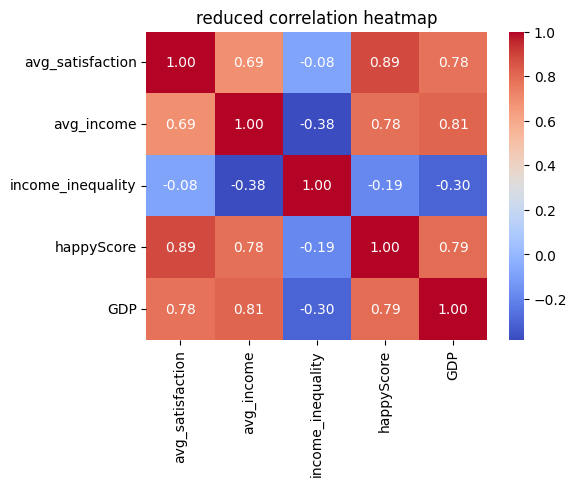

In [7]:
# YOUR CODE HERE
corr= reduced_numerical_df.corr(method='pearson')
plt.figure (figsize=(5.5, 4))
sns.heatmap (corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('reduced correlation heatmap')
plt.show()

## Drawing Scatter Plots

Now that we have a general understanding of the correlations within the happy_df dataset, let’s take a closer look at these relationships. We’ll start by visualizing the correlation between happyScore and another variable with a strong positive correlation, such as GDP. To achieve this, we can create a scatter plot:

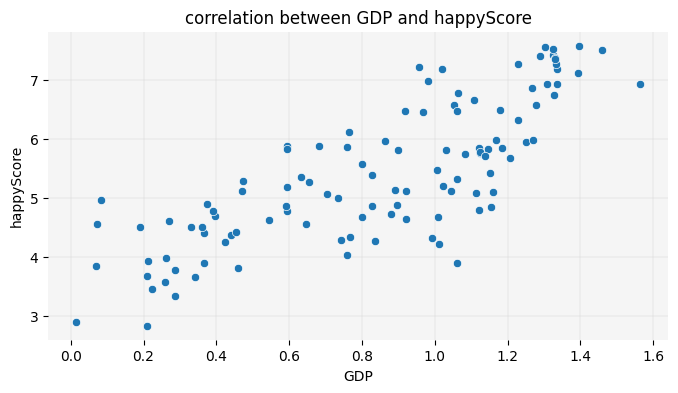

In [9]:
# defining the size of the graph: 
plt.figure(figsize=(8, 4))

# creating a scatte plot, using the seaborn library:
# YOUR CODE HERE
sns.scatterplot(data=happy_df, x='GDP', y='happyScore', zorder=3)

"""
The following block of code enhances the visual appeal of the graph:
"""
# adding grid to the plot:
plt.grid(True, zorder=0, color='lightgray', linestyle='-', linewidth=0.3)

# removing all spines (edges):
sns.despine(left=True, bottom=True)

# setting the background color:
plt.gca().set_facecolor('whitesmoke')
"""
End of customization 
"""

# giving the graph a title:
plt.title('correlation between GDP and happyScore')

# diyplaying the graph: 
plt.show()

### ✨ Fun Fact

You are now one step away from understanding how machine learning models predict values. Such a model calculates relationships between features, as shown above, and fits a line to represent them. This involves drawing a line on the scatter plot so that the sum of the squared distances from each point to the line is minimized. This line, as you learned in the previous chapter, is called a regression line. The method used to calculate the line’s position is known as linear regression in statistics. Here is the code to display the regression line on the graph:

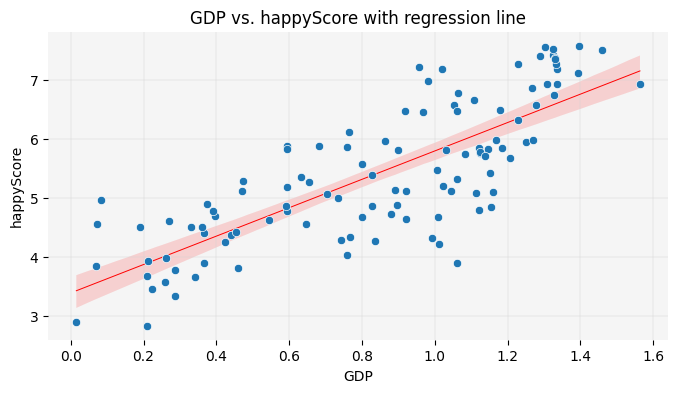

In [10]:
plt.figure(figsize=(8, 4))

sns.scatterplot(data=happy_df, x='GDP', y='happyScore', zorder=3)

plt.grid(True, zorder=0, color='lightgray', linestyle='-', linewidth=0.3)
sns.despine(left=True, bottom=True)
plt.gca().set_facecolor('whitesmoke')

# adding a regression line to the graph:
# YOUR CODE HERE
sns.regplot(data=happy_df, x='GDP', y='happyScore', scatter=False, color='red', line_kws= {'zorder':2, 'linewidth':0.7})

plt.title('GDP vs. happyScore with regression line')
plt.show()

Visualizing the regression line remains a valuable tool in data storytelling. It allows you to make approximate guesses about certain values not present in the dataset by inferring them from the available data. You will have the opportunity to practice this skill at the end of this episode.

### ✨ 

What if we also wanted to visualize the region of each country represented by a dot in the scatter plot? Unlike the heatmap, which couldn’t display regions due to their categorical nature, the scatter plot allows us to assign a unique color to each region. This way, we can see which regions tend to have the highest GDP and happyScore values:

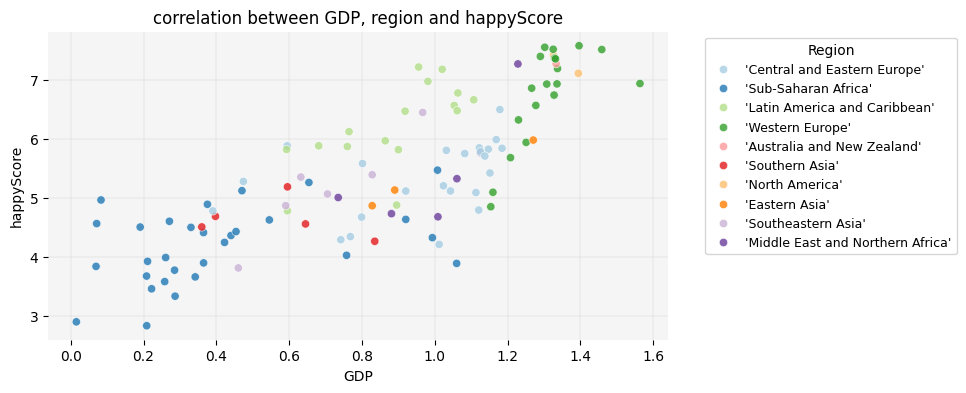

In [13]:
plt.figure(figsize=(8, 4))

# adding region to the graph as hue:
# YOUR CODE HERE
sns.scatterplot(data=happy_df, x='GDP', y='happyScore', hue='region', palette='Paired', alpha=0.8, zorder=3)

plt.grid(True, zorder=0, color='lightgray', linestyle='-', linewidth=0.3)
sns.despine(left=True, bottom=True)
plt.gca().set_facecolor('whitesmoke')

# adding a legend to the graph:
# YOUR CODE HERE
plt.legend (title='Region', title_fontsize='10', fontsize='9', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('correlation between GDP, region and happyScore')
plt.show()

## Drawing Bubble Charts

Let’s add one more variable to the graph to explore how avg_income is distributed across different regions and how it correlates with region, GDP and happyScore. We’ll add avg_income as the node size in the scatter plot, creating a bubble chart:

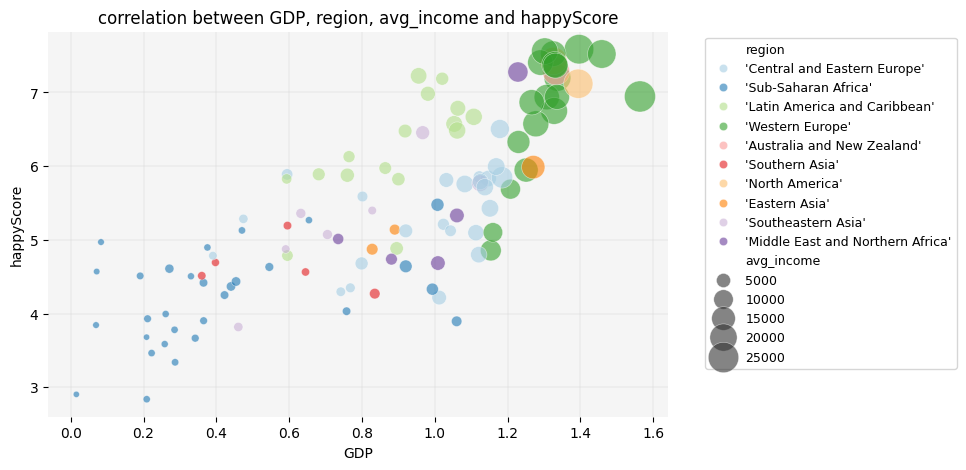

In [15]:
plt.figure(figsize=(8, 5))

# adding avg_income to the graph as node size:
# YOUR CODE HERE
sns.scatterplot(data=happy_df, x='GDP', y='happyScore', hue='region', size='avg_income', sizes=(20,500), palette='Paired', alpha=0.6, zorder=3)

plt.grid(True, zorder=0, color='lightgray', linestyle='-', linewidth=0.3)
sns.despine(left=True, bottom=True)
plt.gca().set_facecolor('whitesmoke')
plt.legend(fontsize='9', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('correlation between GDP, region, avg_income and happyScore')
plt.show()

## Diving Deeper into Details

As a final step in our exploration, let’s focus on the countries in Sub-Saharan Africa to identify which ones have a low GDP but a high happyScore:

In [16]:
# selecting only the countries that belong to the Sub-Saharan Africa and storing them in a new DataFrame:
# YOUR CODE HERE
african_df=happy_df[happy_df['region']== "'Sub-Saharan Africa'"]

african_df.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
1,Angola,26.0,4.3,3.19,1448.88,1044.24,42.72,'Sub-Saharan Africa',4.033,0.75778,Angola
8,Burkina Faso,37.0,4.4,2.02,870.84,630.24,39.76,'Sub-Saharan Africa',3.587,0.25812,Burkina Faso
10,Burundi,25.0,2.9,1.96,572.88,436.92,33.36,'Sub-Saharan Africa',2.905,0.01530,Burundi
11,Benin,20.0,3.0,2.70,989.04,657.00,43.44,'Sub-Saharan Africa',3.340,0.28665,Benin
14,Botswana,36.0,4.7,2.42,3484.68,1632.60,60.46,'Sub-Saharan Africa',4.332,0.99355,Botswana


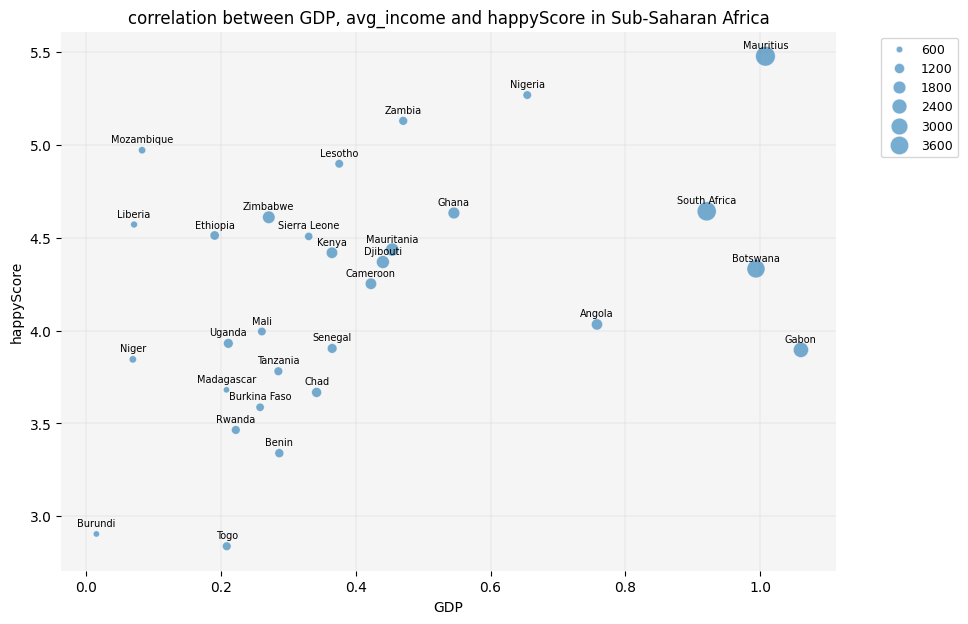

In [22]:
plt.figure(figsize=(10, 7))

# YOUR CODE HERE
sns.scatterplot(data= african_df, x='GDP', y='happyScore', size='avg_income', sizes=(20, 200), alpha=0.6, zorder=3)

plt.grid(True, zorder=0, color='lightgray', linestyle='-', linewidth=0.3)
sns.despine(left=True, bottom=True)
plt.gca().set_facecolor('whitesmoke')

# adding country names to the nodes:
for i in range(len(african_df)):
    plt.text(
        african_df['GDP'].iloc[i],
        african_df['happyScore'].iloc[i]+0.03,
        african_df['country'].iloc[i],
        fontsize=7,
        ha='center',
        va='bottom'
    )

plt.legend(fontsize='9', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('correlation between GDP, avg_income and happyScore in Sub-Saharan Africa')
plt.show()

## Exercise

Take two countries that are not listed in the DataFrame, for example Iran and Turkey. Given the correlations that we have so far detected in the dataset, try to predict how high their happyScore is. To do so, you need the following information:

- Which region do these countries belong to?
- Which countries in happy_dfare culturally more similar to Iran and Turkey?
- How high are GDP and avg_income in these countries?

Create a scatter plot or a bubble chart with a regression line and try to predict where the happy_scores of these two countries, Iran and Turkey, would be placed on the chart.

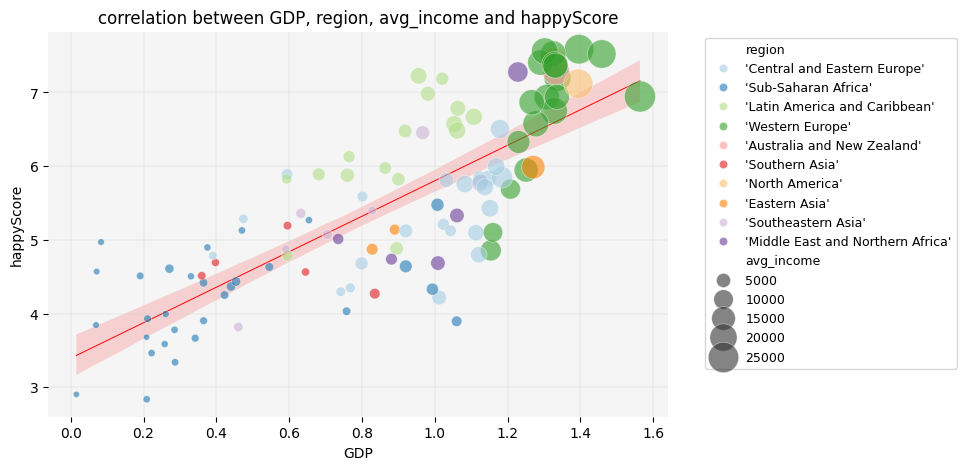

In [23]:
plt.figure(figsize=(8, 5))

# adding avg_income to the graph as node size:
# YOUR CODE HERE
sns.scatterplot(data=happy_df, x='GDP', y='happyScore', hue='region', size='avg_income', sizes=(20,500), palette='Paired', alpha=0.6, zorder=3)

plt.grid(True, zorder=0, color='lightgray', linestyle='-', linewidth=0.3)
sns.despine(left=True, bottom=True)
plt.gca().set_facecolor('whitesmoke')
plt.legend(fontsize='9', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.regplot (data=happy_df, x='GDP', y='happyScore', scatter=False, color='red', line_kws= {'zorder':2, 'linewidth':0.7})

plt.title('correlation between GDP, region, avg_income and happyScore')
plt.show()